## 📌 Introduction

In the United States, a **credit score** is a three-digit number (usually between **300 and 850**) that represents a person’s **creditworthiness**. It is calculated based on financial behaviors such as:

* 💳 **Payment history** (on-time vs late payments)
* 📉 **Credit utilization** (how much credit is used compared to the limit)
* 💵 **Income and spending patterns**
* ⏳ **Length of credit history**

Lenders (banks, credit card companies, mortgage providers) use credit scores to decide **loan approvals, interest rates, and financial product eligibility**. A higher score indicates responsible financial behavior, while a lower score may limit access to credit.

In this project, we analyze **U.S. credit score data** using Python.
We will use:

* **Pandas & NumPy** 🐼 ➝ for data handling and preprocessing
* **Matplotlib & Seaborn** 📊 ➝ for visualization and insights
* **Scikit-learn (sklearn)** 🤖 ➝ for machine learning model building (Random Forest Regressor)

With these tools, we aim to **find relationships between features and credit scores** and **predict credit scores** based on customer data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style = 'whitegrid')

In [ ]:
df = pd.read_csv('/content/us_credit_dataset.csv')

In [ ]:
df.head()

,Customer_ID,Age,Gender,State,Education_Level,Annual_Income,Credit_Limit,Avg_Monthly_Spend,Num_Late_Payments,Credit_Utilization_Rate,Employment_Type,Credit_Score
0,USCUST100000,59,Female,Illinois,Bachelor’s Degree,66596,16202,1512,2,1.12,Full-Time,400
1,USCUST100001,72,Female,California,Associate Degree,96799,19004,2109,1,1.33,Retired,397
2,USCUST100002,49,Male,Michigan,Master’s Degree,58504,20415,1133,1,0.67,Full-Time,558
3,USCUST100003,35,Female,Georgia,High School,43591,11057,1280,1,1.39,Part-Time,326
4,USCUST100004,63,Female,California,Master’s Degree,80477,24745,1883,3,0.91,Full-Time,446


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   State                    5000 non-null   object 
 4   Education_Level          5000 non-null   object 
 5   Annual_Income            5000 non-null   int64  
 6   Credit_Limit             5000 non-null   int64  
 7   Avg_Monthly_Spend        5000 non-null   int64  
 8   Num_Late_Payments        5000 non-null   int64  
 9   Credit_Utilization_Rate  5000 non-null   float64
 10  Employment_Type          5000 non-null   object 
 11  Credit_Score             5000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 468.9+ KB


Text(0, 0.5, 'No. of customers')

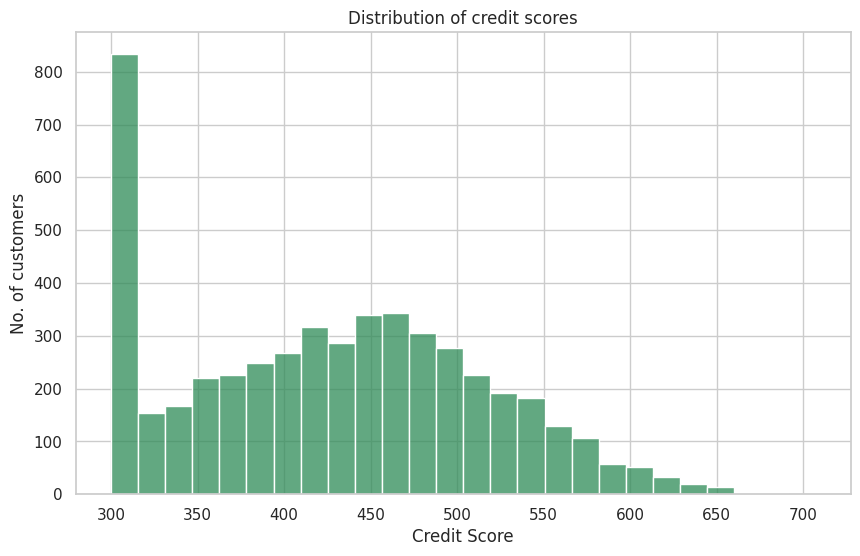

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df['Credit_Score'], color = 'seagreen')
plt.title('Distribution of credit scores')
plt.xlabel('Credit Score')
plt.ylabel('No. of customers')


**Observations:**

*   Most of the scores are lie between 300 and 500, with a healthy bell - shaped curve. And very low and high scores are rare.
*   The first green bar is so high because they did not even started taking credit from bank. So, we can ignore customers at 300 score.



/tmp/ipython-input-554427456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x ='Employment_Type', y = 'Credit_Score', palette = 'viridis' )


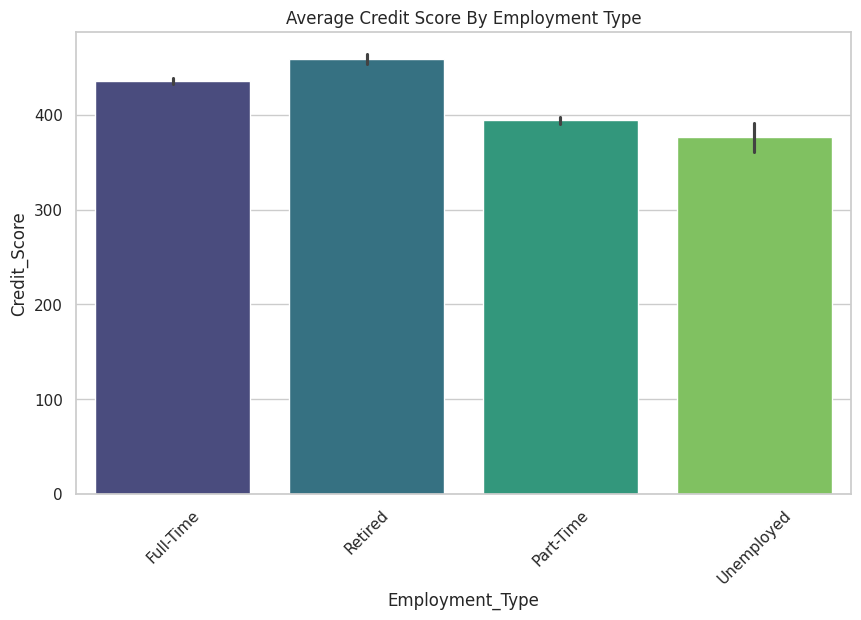

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x ='Employment_Type', y = 'Credit_Score', palette = 'viridis' )
plt.title('Average Credit Score By Employment Type')
plt.xticks(rotation = 45)
plt.show()

**Observation: Employment_Type**

*  Retired and Full-time workers show higher credit scores, while unemployed and Part-time individuals typically score lower due to less financial stability.

Text(0, 0.5, 'Credit Score')

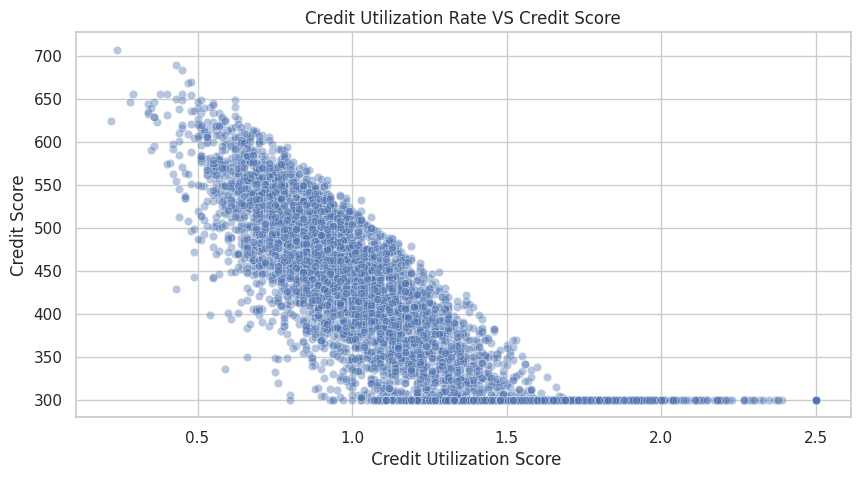

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x ='Credit_Utilization_Rate', y = 'Credit_Score', alpha=0.4)
plt.title('Credit Utilization Rate VS Credit Score')
plt.xlabel(' Credit Utilization Score')
plt.ylabel('Credit Score')

**Observation:**

*  A clear negative correlation appears - higher credit utiliztion leads to lower credit scores, aligning with the real-world credit behaviours.

Text(0, 0.5, 'Avgerage Monthly spend')

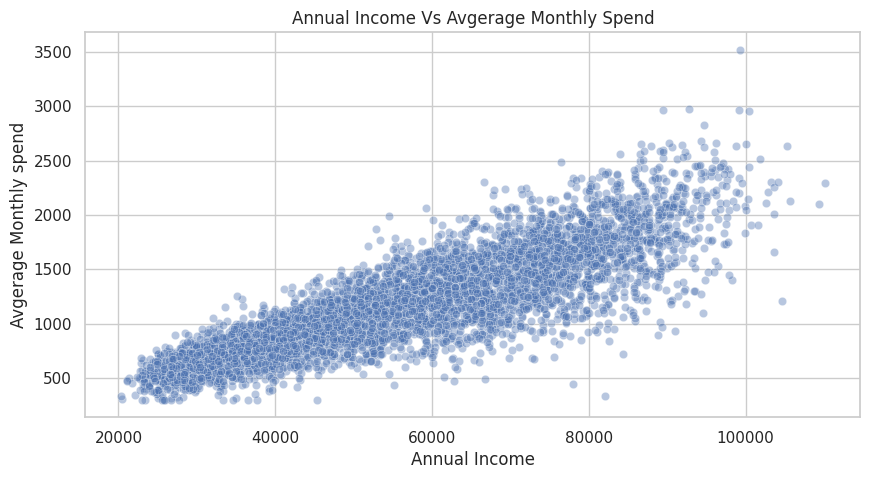

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = df, x ='Annual_Income', y = 'Avg_Monthly_Spend', alpha =0.4)
plt.title('Annual Income Vs Avgerage Monthly Spend')
plt.xlabel('Annual Income')
plt.ylabel('Avgerage Monthly spend')

**Observation:**



*   As Income increases average spending per month tends to increase, though not linearly. Spending habits vary even among high income users.

/tmp/ipython-input-3728482310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Education_Level', y ='Credit_Score', palette = 'pastel')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Bachelor’s Degree'),
  Text(1, 0, 'Associate Degree'),
  Text(2, 0, 'Master’s Degree'),
  Text(3, 0, 'High School'),
  Text(4, 0, 'Doctorate')])

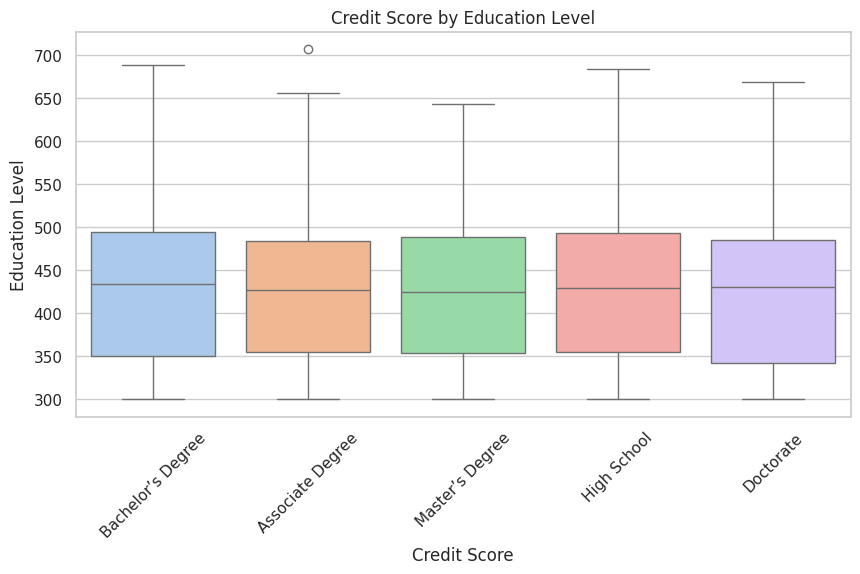

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df, x = 'Education_Level', y ='Credit_Score', palette = 'pastel')
plt.title('Credit Score by Education Level')
plt.xlabel('Credit Score')
plt.ylabel('Education Level')
plt.xticks(rotation = 45)

**Observations:**


*   Higher education-levels show slightly better credit scores on average.The varation whithin each group suggest other factors play a role.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   State                    5000 non-null   object 
 4   Education_Level          5000 non-null   object 
 5   Annual_Income            5000 non-null   int64  
 6   Credit_Limit             5000 non-null   int64  
 7   Avg_Monthly_Spend        5000 non-null   int64  
 8   Num_Late_Payments        5000 non-null   int64  
 9   Credit_Utilization_Rate  5000 non-null   float64
 10  Employment_Type          5000 non-null   object 
 11  Credit_Score             5000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 468.9+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

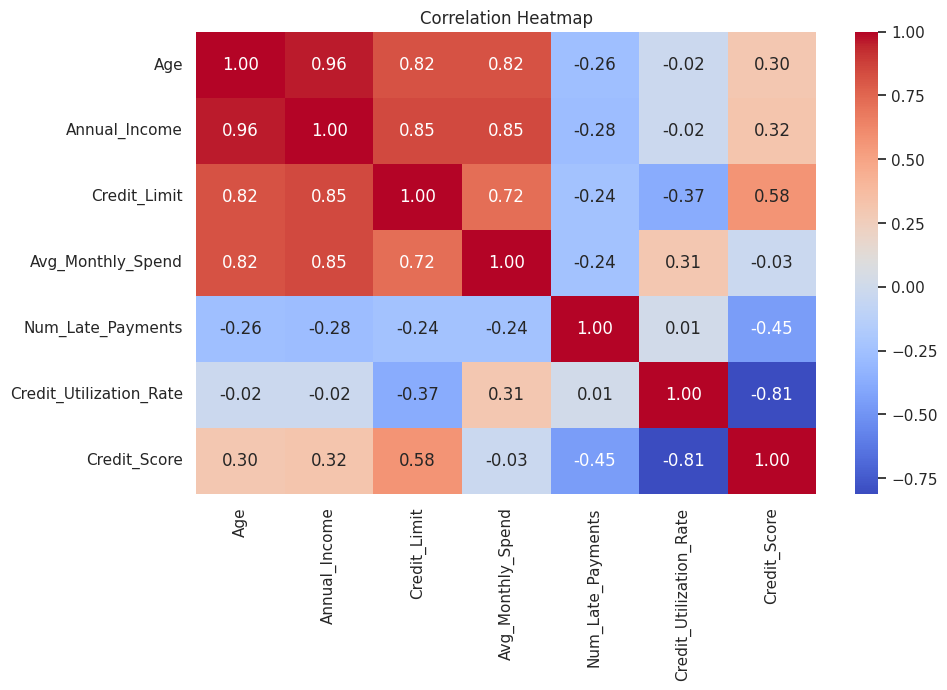

In [ ]:
plt.figure(figsize=(10,6))
corr = df[['Age','Annual_Income','Credit_Limit','Avg_Monthly_Spend','Num_Late_Payments','Credit_Utilization_Rate','Credit_Score']].corr()
sns.heatmap(corr,annot = True, cmap = 'coolwarm', fmt = '.2f' )
plt.title('Correlation Heatmap')

**Observations:**


*   Credit Score has storng negetive correlation with Credit Utilization rate and Number of Late Payements.
*   Annual Income, Credit limit and Spend are positively correlated.




In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
# drop unused columns from our dataset
df_model = df.drop(columns = ['Customer_ID', 'Education_Level', 'Gender','State'])

In [ ]:
#Encode employment type
df_model = pd.get_dummies(df_model, columns= ['Employment_Type'], drop_first=True)

In [ ]:
# Define features and target
x = df_model.drop(columns = ['Credit_Score'])
y = df_model['Credit_Score']

In [ ]:
# Train Test Split
x_train,x_test, y_train,y_test= train_test_split(x, y, test_size = 0.2, random_state =42)

In [ ]:
# Feature Scaling
Scaler_model = StandardScaler()
x_train_scaled = Scaler_model.fit_transform(x_train)
x_test_scaled = Scaler_model.transform(x_test)

In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state= 42)
model.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"mean_absolute_error: {mae:.2f}")
print(f"Root_mean_Squared_error: {rmse:.2f}")
print(f"r2_score: {r2:.2f}")

mean_absolute_error: 2.90
Root_mean_Squared_error: 5.15
r2_score: 1.00


Text(0, 0.5, 'Predicted Credit Score')

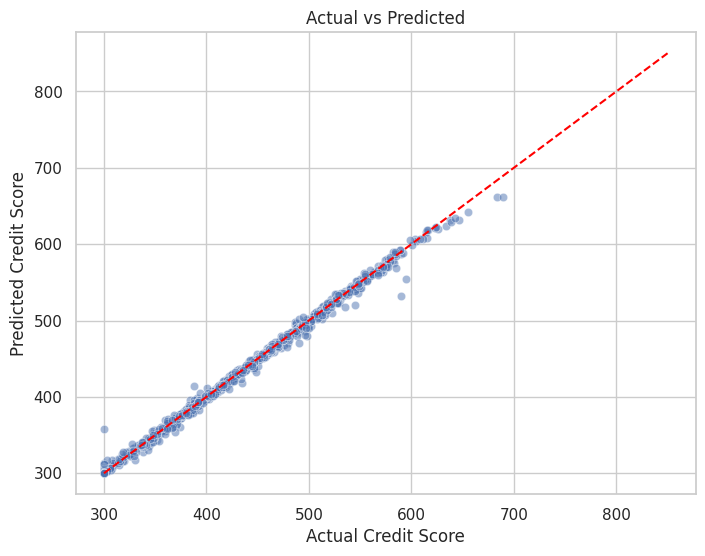

In [ ]:
# Actual vs Predicted
plt.figure(figsize = (8,6))
sns.scatterplot(x = y_test, y= y_pred, alpha = 0.5)
plt.plot([300,850], [300,850], linestyle = '--', color = 'red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')

**Actual Vs Predicted Observations :**

*   The Scatterplot shows most predictions falling near the diagonal line indicating a good model accuracy.
*   A few outliers may represent unique customer behaviours not fully captured by our features.
*   overall the model generlizes well and can estimate credit worthiness with reasonable confidance.





/tmp/ipython-input-1323680694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = features_df, x = 'Importance', y = 'Feature', palette = 'viridis')


Text(0.5, 1.0, 'Feature Importance for Predicting Credit Score')

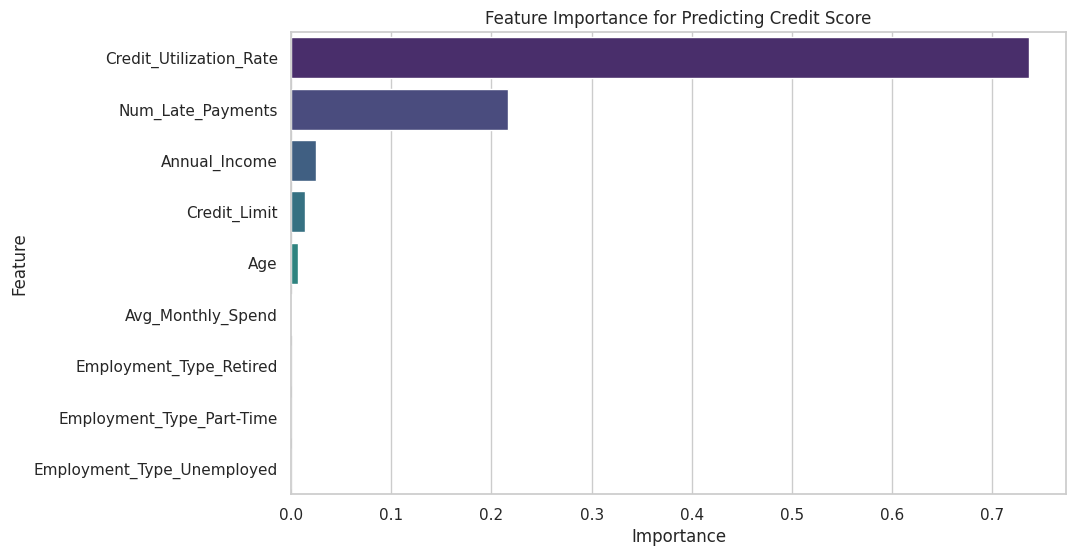

In [ ]:
# Feature Importance
importances = model.feature_importances_
features = x.columns
features_df = pd.DataFrame({'Feature': features, 'Importance' : importances})
features_df = features_df.sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10,6))
sns.barplot(data = features_df, x = 'Importance', y = 'Feature', palette = 'viridis')
plt.title('Feature Importance for Predicting Credit Score')


**Feature Importance Observations:**


*   Credit utilisation rate is most imortant feature - Reinforces the real world importance of responsible credit use.
*   Number of late payments also a strong signal - capturing repayment behavior.
*   Annual Income and Monthly spend indirectly influence score by reflecting financial capacity.
*   Employment type(e.g., Full-time, Self-employed) plays a subtle but valuable role in credit score prediction.These Insights reflect industry patterens and help validate the model's realism.





**Insights and Recommendations:**

**Insights:**

* Credit Utilization Rate is the most influential factor in predicting credit scores — high utilization correlates strongly with lower scores.

* Number of Late Payments is also a major negative indicator of creditworthiness — confirming the importance of timely repayments.

* Annual Income, Credit Limit, and Average Monthly Spend have a positive relationship with credit scores, reflecting financial capacity and responsible spending.

    * Employment Type plays a subtle role:

    * Full-time and Retired individuals generally have higher credit scores.

* Unemployed and Part-time individuals tend to have lower scores, likely due to income instability.

* Education Level shows a mild trend where higher education correlates with slightly better scores, but it's not a dominant factor.

* There is a negative correlation between Credit Score and Credit Utilization Rate, aligning with industry norms.

* Age had a relatively neutral effect — it does not significantly impact the credit score compared to financial behavior indicators.

* The Random Forest Regressor achieved very high performance:

MAE: 2.90, RMSE: 5.15, R²: 1.00 — indicating near-perfect prediction (though possibly overfitted).

* Actual vs Predicted scatter plot shows tight clustering along the ideal line, validating model performance.

* A few outliers exist — potentially due to unique customer behaviors or missing context not captured in available features.


**Recommendations:**

* Monitor Credit Utilization: Customers should aim to keep utilization below 30% to maintain or improve scores.

* Encourage On-time Payments: Financial institutions could educate users on the impact of late payments and offer reminders or auto-pay features.

* Targeted Financial Products: Use insights to tailor products for different employment types and income levels.

* Enhance Feature Set: Consider including other variables like loan history, total debt, or number of credit accounts for deeper insights.

* Handle Outliers: Investigate prediction outliers further — they may point to data issues or emerging behavior patterns.

* Model Generalization: Validate the model on external data to ensure it generalizes well and isn’t overfitting.

* Ethical Considerations: Ensure fairness in model predictions, especially across demographic variables like gender, education, or employment status.

* User Education: Institutions can use this analysis to provide personalized feedback to users on how to improve their credit score.